# Задание 1

---

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import factorial

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [158]:
def linan(A, B):
  if (np.linalg.matrix_rank(A) == np.linalg.matrix_rank(np.hstack((A, np.array_split(B, len(B)))))):
    if (np.linalg.matrix_rank(A) < len(A[0])):
      return "Infinity number of solutions"
    return np.linalg.solve(A, B)
  return "The system cannot be solved"

A = []
B = []
for i in range(2):
  exp = list(map(float, input().split()))
  A.append(exp[0:-1])
  B.append(exp[-1])

print(' '.join([str(round(i, 3)) for i in linan(A, B)]))

0.2 0.3 1
0.5 0.3 7
20.0 -10.0


### Подсказка 1

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [151]:
def decorate_matrix(n):
  matrix = np.ones((n, n))
  matrix[1:-1, 1:-1] = 0
  return matrix

In [160]:
n = int(input())
decorate_matrix(n)

5


array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [1]:
a, b = map(float, input().split())

3 4


In [4]:
def f(x, a, b):
  return np.power((x + a), 2) - b

def g(x, a, b):
  return np.absolute(f(x, a, b))

f_min = [-a]
g_min = np.roots([1, 2 * a, np.power(a, 2) - b])
if (np.iscomplex(g_min[0])):
  g_min = f_min

mins = np.concatenate((f_min, g_min))

print(' '.join([str(min) for min in mins]))

-3.0 -5.0 -1.0


# Задание 4


Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

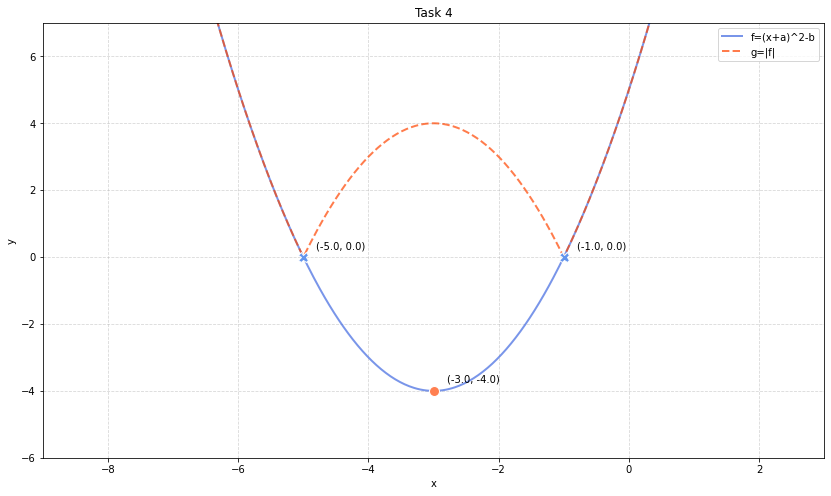

In [5]:
points = []
color = ["coral", "cornflowerblue", "cornflowerblue"]
style = ["o", "X", "X"]
for root in mins:
  points.append((root, f(root, a, b), color[len(points)], style[len(points)]))

x = np.linspace(points[0][0] - 6, points[0][0] + 6, 500)
 
fig = plt.figure(figsize = (14, 8))
 
plt.plot(x, f(x, a, b), 'royalblue', label = 'f=(x+a)^2-b', alpha = 0.7, linewidth=2)

plt.plot(x, g(x, a, b), 'orangered', label = 'g=|f|', linestyle="--", alpha = 0.7, linewidth=2)

for i, j, color, style in points:
  plt.plot(i, j, marker=style, markersize=10, markeredgecolor="white", markerfacecolor=color)
  plt.text(i + 0.2, j + 0.25, '({}, {})'.format(i, j))

plt.legend()
plt.grid(True, linestyle ='--', alpha=0.5)
plt.xlim([points[0][0] - 6, points[0][0] + 6])
plt.ylim([points[0][1] - 2, points[0][1] + 11])
 
plt.title('Task 4')
plt.xlabel('x')
plt.ylabel('y')
 
plt.show()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

## Аналитика
5.1 и 5.2 решаются одинаковой формулой.
1. Найдем вероятность, что в серии бросков длины `n` есть серия длины `m` подряд той же самой стороной. Она может выпасть либо сразу, либо спустя несколько бросков, причём бросок до неё должен быть другой стороной:

$P(A) = \frac{1}{2^m} + t \cdot \frac{1}{2} \cdot \frac{1}{2^m}$

Подсерия может встать на любую из $t = n - m$ позиций, так учитываем её "сдвиг". Нас интересует серия подряд любой стороной монеты, поэтому:

$P(A) = \frac{2 + t}{2^m}$.
2. $P(\overline{A})$ — человеку не выпала серия подряд из $m$.
3. Если никому не выпала заданная серия, то противоположным событием будет, что хоть кому-то выпала:

$1 - P(\overline{A})^{testers}$

In [6]:
def probability_at_least_one(required, total, testers):
  return 1 - np.power(1 - ((total - required + 2) / np.power(2, required)), testers)

In [7]:
print(f"5.1: {probability_at_least_one(10, 10, 1000)}")

5.1: 0.858440454732242


In [8]:
print(f"5.2: {probability_at_least_one(8, 10, 1000)}")

5.2: 0.9999998552643654


5.3 решается через Бернулли

In [11]:
ans_5_3 = (factorial(1000) / (factorial(3) * factorial(997))) * np.power(probability_at_least_one(10, 10, 1), 3) * np.power(1 - probability_at_least_one(10, 10, 1), 997)
print(f"5.3: {ans_5_3}")

5.3: 0.1762873858121736


При желании 5.3 можно также решить через локальную теорему Муавра — Лапласа. Однако будет определенная погрешность, потому что число испытаний большое, но не слишком:
$P_nm ≃ \frac{1}{\sqrt{npq}} \cdot φ(x)$.

$x = \frac{m-np}{\sqrt{npq}}$

$φ(x)$ - функция Гаусса.
Найдем функцию Гаусса по таблице: φ(0.75) = 0.3056

In [12]:
ans_5_3_lp = (1 / np.sqrt(1000 * probability_at_least_one(10, 10, 1) * (1 - probability_at_least_one(10, 10, 1)))) * 0.3056
print(f"5.3 через Муавра-Лапласа: {ans_5_3_lp}")

5.3 через Муавра-Лапласа: 0.21888341746682627


In [22]:
print(f"Погрешность: {np.absolute(ans_5_3-ans_5_3_lp)}")

Погрешность: 0.04259603165465267


## Метод Монте-Карло
Все 3 задания можно просимулировать через одну функцию `def monte_carlo`, которая принимает на вход:
- `tests`- сколько симуляций надо совершить
- `testers`- сколько тестеров (людей) в одной симуляции
- `coin_flips` - сколько бросков монеты делает один тестер
- `target_flips` - сколько подряд бросков монеты одной стороной считается успехом
- `limit` - есть ли предел, если `= 0`, то считаем, что его нет

Внутри функция содержит несколько счётчиков:
- `gs` - кол-во глобальных успехов
- `ts` - кол-во успехов внутри одной симуляции 
- `ls` - локальный успех одного тестера

Соответственно, есть определенная оптимизация:
- Если `limit = 0`, то симуляция обрывается и считается успешной, как только был достигнут хотя бы один `ls`
- Если `limit > 0`, то симуляция обрывается и считается неуспешной, если `ts > limit`

In [8]:
def monte_carlo(tests, testers, coin_flips, target_flips, limit = 0):
  gs = 0
  for test in range(tests):
    ts = 0
    for tester in range(testers):
      ls = 0
      seq = np.random.choice([1, 0], size = coin_flips, p = [.5, .5])
      if np.sum(seq) >= target_flips or np.sum(seq) <= (coin_flips - target_flips):
          for pos in range(coin_flips - target_flips + 1):
            if np.sum(seq[0 + pos: target_flips + pos]) in [target_flips, 0]:
              ls = 1
              break
      if ls:
        ts += 1
        if limit and ts > limit:
          ts = 0
          break
        elif limit == 0:
          break
    if limit: 
      ts = 0 if ts < limit else 1
    gs += ts

  return gs / tests

In [266]:
print(f"5.1: {monte_carlo(1000, 1000, 10, 10)}")

5.1: 0.854


In [267]:
print(f"5.2: {monte_carlo(1000, 1000, 10, 8)}")

5.2: 1.0


In [183]:
print(f"5.3: {monte_carlo(10000, 1000, 10, 10, limit = 3)}")

5.3: 0.1742
